In [1]:
import pandas as pd
import numpy as np
from lsynth import compute_upsilon, generate_syndata
import seaborn as sns
#MODEL='./modelHRS72p05.gz'
#DATA="./HRSvar72.csv"
DATA='../datasets/gss_2018.csv'
model_path="../datasets/gss_2018.joblib"
orig_df=pd.read_csv(DATA,keep_default_na=False)

In [2]:
# 1. Generate synthetic data with a chosen generator
df_lsm = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="LSM",
    n_workers=11,
)

Loading model from ../datasets/gss_2018.joblib ...
Generating 100 rows via LSM (qsample).


qsample(LSM, threads=11): 100%|███████████████| 100/100 [01:02<00:00,  1.59it/s]


In [3]:
# 1. Generate synthetic data with a chosen generator
df_baseline = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="BASELINE",
    orig_df=orig_df,
    n_workers=11,
)

Loading model from ../datasets/gss_2018.joblib ...
Generating 100 rows via BASELINE (independent columns).


In [4]:
# 1. Generate synthetic data with a chosen generator
df_ctgan = generate_syndata(
    num=100,
    model_path=model_path,
    gen_algorithm="CTGAN",
    orig_df=orig_df.sample(50),
    n_workers=11,
)

Loading model from ../datasets/gss_2018.joblib ...
Generating 100 rows via CTGAN.
PerformanceAlert: Using the CTGANSynthesizer on this data is not recommended. To model this data, CTGAN will generate a large number of columns.

Original Column Name   Est # of Columns (CTGAN)
wrkstat                8
HRS1                   4
HRS2                   2
evwork                 3
wrkslf                 3
wrkgovt                3
OCC10                  4
PRESTG10               4
PRESTG105PLUS          4
INDUS10                5
marital                5
martype                2
divorce                3
widowed                3
spwrksta               5
SPHRS1                 4
SPHRS2                 1
spevwork               2
cowrksta               4
cowrkslf               3
coevwork               2
COHRS1                 4
COHRS2                 1
spwrkslf               3
SPOCC10                4
SPPRES10               4
SPPRES105PLUS          4
SPIND10                23
COOCC10                

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:29<00:00,  3.34it/s]


0.7971736649952134


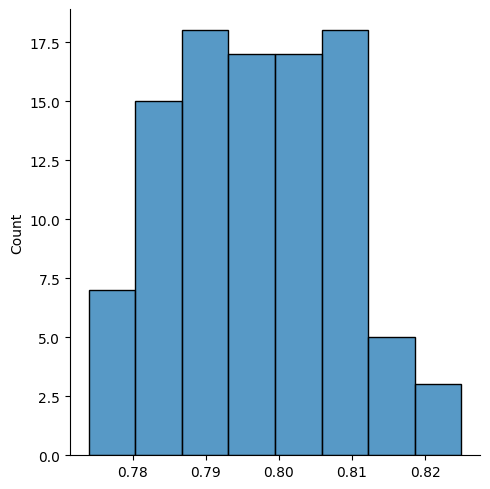

In [5]:
# 2. Compute Upsilon on that synthetic dataframe
ups_lsm, _ = compute_upsilon(
    df_lsm,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_lsm))
sns.displot(ups_lsm)

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:31<00:00,  3.19it/s]


0.7482693985834239


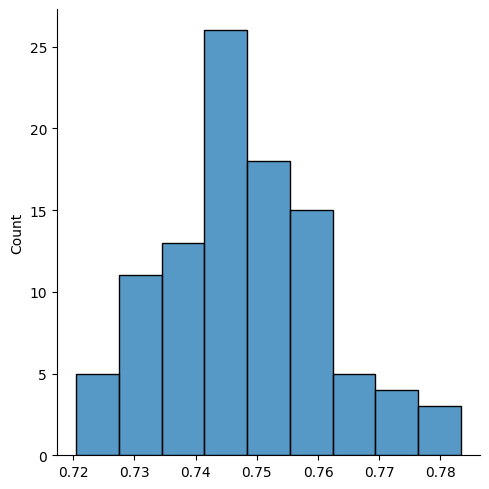

In [6]:
# 2. Compute Upsilon on that synthetic dataframe
ups_baseline, _ = compute_upsilon(
    df_baseline,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_baseline))
sns.displot(ups_baseline)

Loading model from ../datasets/gss_2018.joblib ...
Computing Upsilon on DataFrame with 100 rows ...


average_fidelity(threads=11): 100%|███████████| 100/100 [00:30<00:00,  3.27it/s]


0.7482693985834239


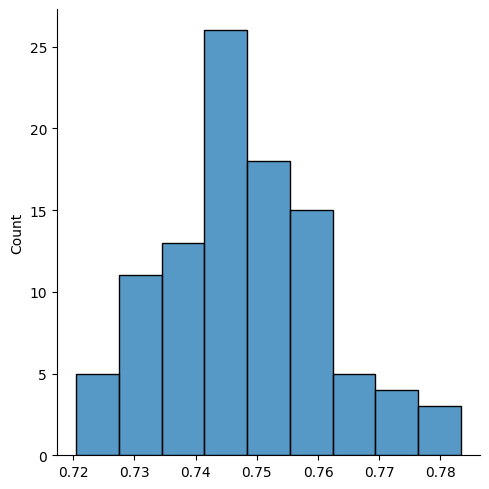

In [7]:
# 2. Compute Upsilon on that synthetic dataframe
ups_ctgan, _ = compute_upsilon(
    df_baseline,
    model_path=model_path,
    n_workers=11,
)
print(np.nanmean(ups_ctgan))
sns.displot(ups_ctgan)

In [8]:
! pwd

/home/ishanu/Dropbox/ZED/Research/lsynth/local_examples
